# Face Recognition with a Support Vector Machine

Bas Michielsen

Face recognition is the ability for the computer to identify a person based on an image of their face. This is a classification problem, where each possible person is a class, and the provided image should lead to 1 specific class with a as high as feasible certainty. In order to train a classification model with this, we need as many as possible images of the same person's face. In this exercise we use a dataset that is provided by sklearn called the 'Olivetti Faces'. Mote information can be found at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

The dataset has 400 images for 40 different persons, namely exactly 10 images per person. The dataset is also labelled, so for every image we know the correct class. Now we can use this dataset to train a model.

We start by importing scikit-learn, numpy, matplotlib and seaborn the Python libraries we will be using for this analysis. 

First, we show the versions of these libraries (that is always wise to do in case you have to report problems running the notebooks!) and use the inline plotting mode statement.

In [99]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

print('scikit-learn version:', sk.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

scikit-learn version: 1.0.2
numpy version: 1.22.1
matplotlib version: 3.5.1
seaborn version: 0.11.2


Then let us load the data.

In [100]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

To get an impression of the data, here we show the first photo of each of the 40 unique people in the dataset.

<module 'matplotlib.pyplot' from '/home/bas/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

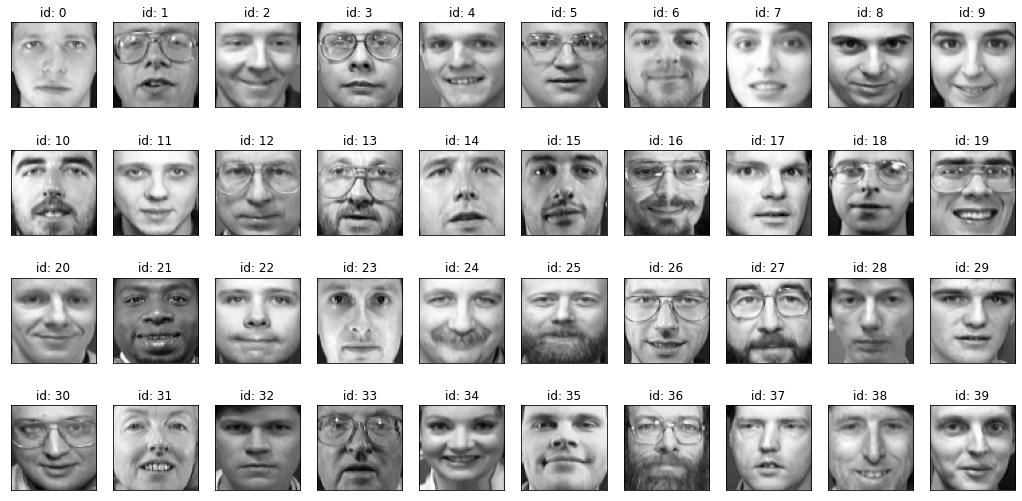

In [101]:
fig, subplots = plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
subplots = subplots.flatten()
    
for id in np.unique(faces.target):
    index = id *10 # Because there are 10 images per person.
    subplots[id].imshow(faces.images[index], cmap="gray")
    subplots[id].set_xticks([])
    subplots[id].set_yticks([])
    subplots[id].set_title("id: {}".format(id))
plt

## Preprocessing
Given that we are using images, there is no such thing as feature selection because you cannot select some pixels to be better indicators than other pixels. We therefore have little to do in terms of preprocessing other than splitting the dataset into a trainset and testset.
We select a stratisfied test size of .3, which means that from every person 30% of the images will be used as testset. Since every person has 10 images, 7 will be selected for training and 3 will be selected for testing. 

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=.3, random_state=0, stratify=faces.target)

## Modelling
In this step we are going to use the trainset only to fit the model. In this case a Support Vector Machine for classification.

In [103]:
from sklearn.svm import SVC # SVC is for classification, an SVR for regression exists as well.
model = SVC()
model.fit(X_train, y_train)

SVC()

After that we can let the model do predictions on the testset and see the accuracy of those predictions.

In [104]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, y_test)
print(acc)

0.8833333333333333


An accuracy of a little more than 88% is not too bad. In fact this is quite good. 😊

## Evaluation
Now let us see if we can shed some light on the results. The first thing we can do here is print a classification report. This shows for every one of the classes how well the model performed. There are 2 metrics to consider, namely Precision and Recall. The F1-score is a quality score based on precision and recall together.

Precision: When the model predicts class X, how often was it correct?

Recall: When the correct class is X, how often did the model predict it so?

Note that both Precision and Recall are fractions, so 1.00 is 100% of the times, and 0.00 is 0% of the times.

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       0.67      0.67      0.67         3
           4       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       0.75      1.00      0.86         3
          17       1.00    

It appears that class 39 has a fairly low Precision, this means that often the model says 39 when in fact it is another person. In other words, quite a number of people get identified as person 39 incorrectly. Also it appears that the classes 0, 25 and 34 have a low Recall, this means that these people often get identified as some else.

The next thing we can do here is making a confusion matrix. This matrix shows all 40 ids (0 - 39) as rows and on every row shows the made predictions for that id in the testset. If the prediction is correct if will show in the [id, id] cell, if not, it will show in another cell and we can see the id that the model predicted instead. Since the testset is stratisfied at 3 images per person, 3 is the maximum of correct classifications, so that should be the vmax parameter.

<AxesSubplot:>

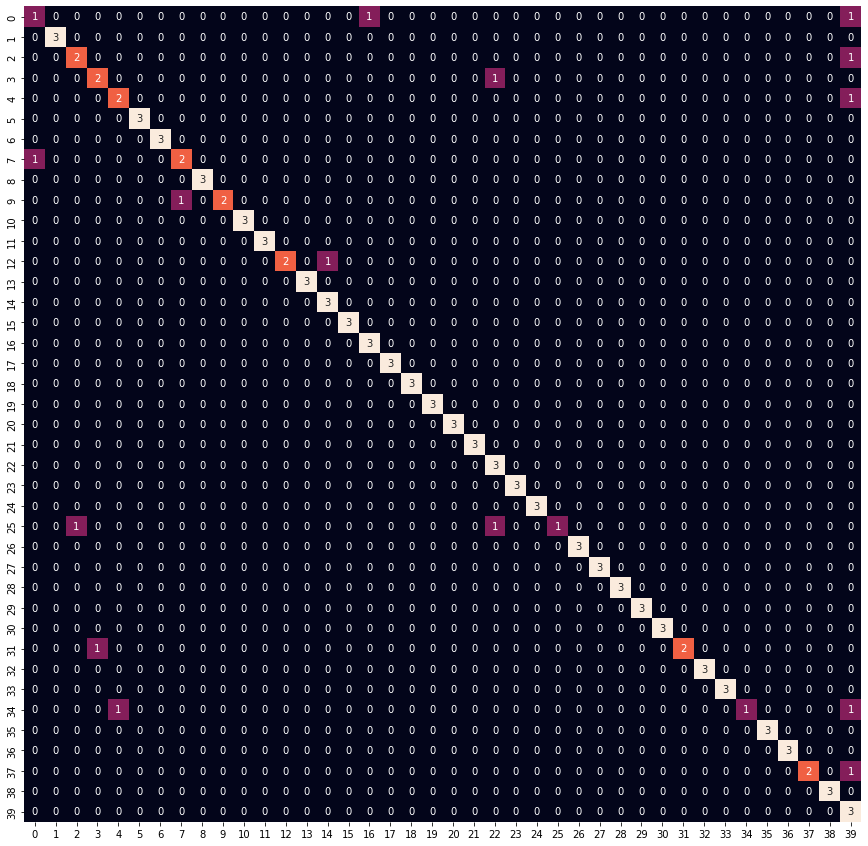

In [106]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(15, 15)) # A size of 15 because it feels good! You can try other numbers if you want.
sns.heatmap(matrix, annot=True, cbar=None, vmax=3)

Of course here we see a similar result as the classification report. In the vast majority of cases the model identifies all 3 images of the same person correctly. However, the column 39 shows many 1s for other rows than 39, and the rows 0, 25 and 34 show many 1s in columns other than the correct one.

# Now it is your turn

Every time you run this notebook it will present the same results. This is due to the fact that the train/test-split is set to chose always the same images as train and test. You can chance this behaviour by removing the random_state parameter. What happens if you remove this paramter and then re-run the notebook? And if you re-run it again? In a few sentences explain why this happens.

The constructor of the Support Vector Machine has an optional parameter named C, which by default is 1.0. Try providing a value of 0.5 for this parameter and see if this makes any difference. Then provide a value of 2.0 for this parameter and note any differences. Which of those 3 values [1.0, 0.5, 2.0] would you say gives the best results and why?

Given the context of this case namely Face recognition, would you argue that a low Precision is worse than a low Recall, or the other way around? Why? Discuss this point with a few fellow students. Do you all agree? Write in a few sentences your arguments and their arguments.